<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/esempio2_Fe_LEMON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#
# inzializzazione delle funzioni (librerie) usate nel notebook
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.stats import chisquare
plt.rc('font', size = 14, family ='Sans-Serif')

# LEMON
phKev       = 2045.15/5.9
pixelscale  = 0.125 
x_resolution = y_resolution = 2048
xyscale = x_resolution/576
rescale_pixelscale = xyscale*pixelscale

In [0]:
#
# carica i dati dal file
#
VarNames=["iTr", "cluster_lable", "pixels", "photons", "ph_pixels", "x0start", "y0start", 
          "x0end", "y0end", "width", "height", "pearson"]

C_file = 'https://raw.githubusercontent.com/gmazzitelli/cygno/master/data/dbscan_run2359_cmin_0_cmax_300_rescale_576_nsigma_1.5_ev_1000_ped_2358.txt'
df = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)

# range
# charge distribution
# charge asimettriy

df['length'] = np.sqrt((df['x0end'] - df['x0start'])**2 + (df['y0end'] - df['y0start'])**2)
df['x0c'] = (df['x0end'] + df['x0start'])/2.
df['y0c'] = (df['y0end'] + df['y0start'])/2.

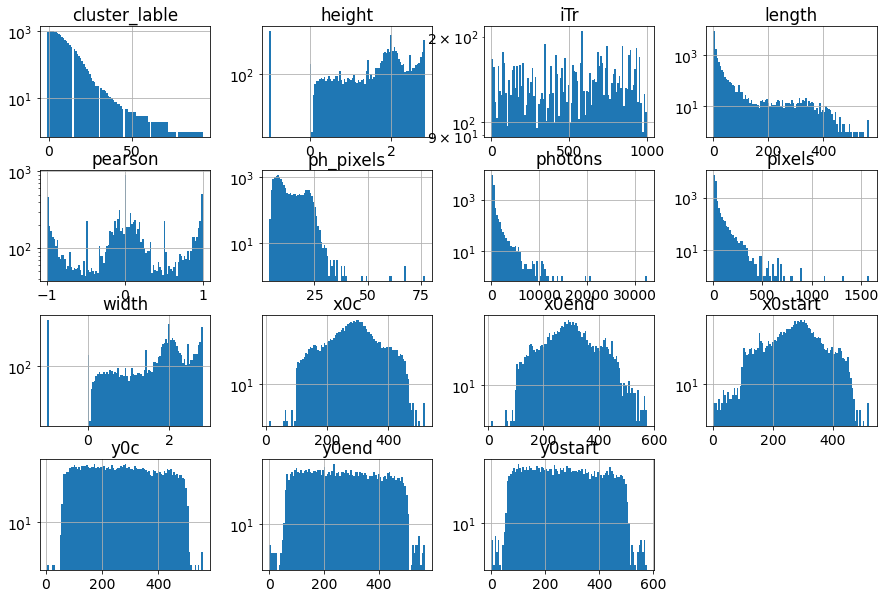

In [39]:
#
# Visulizza tutte le Varibili
#
df.hist(bins=100, figsize=(15,10), log=True)
plt.show()

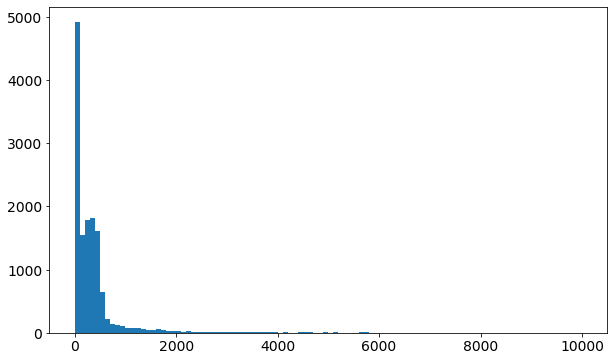

In [54]:
#
# Visualizziamo i fotoni
#
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df['photons'], 100, range=(0,10000))
# ax.set_xlim(0,30)
# ax.set_ylim(0,12)
# ax.set_xlabel('Superficie [$km^2$]')
# ax.set_ylabel(r'Popolazione [$\times 10^6$]')
# plt.title('Densità Popolazione Italiana')
# for k in range(x.size):
#   plt.annotate(df['Regione'][k], (x[k],y[k]),fontsize=12)
# plt.minorticks_on()
# plt.grid()
# plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
#                grid_color='grey', grid_alpha=0.5)
plt.
plt.show()

Fidical Ellips: 100.00, 120.00 [mm]


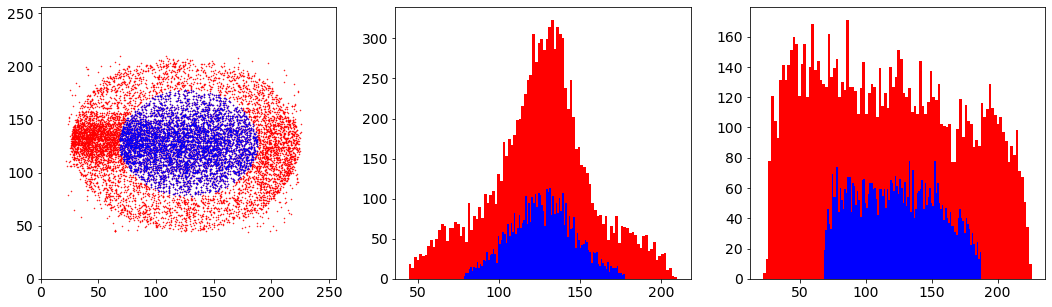

In [53]:
pd.set_option('mode.chained_assignment', None)
dfc = df[(df['cluster_lable'] > -1) & (df['width'] > 0) & (df['height'] > 0)]

# Normalization

dfc['photons']  =dfc['photons']*xyscale*xyscale
dfc['length']   =dfc['length']*rescale_pixelscale
dfc['x0c']      =dfc['x0c']*rescale_pixelscale
dfc['y0c']      =dfc['y0c']*rescale_pixelscale

# fiducializzation

DX = 0 
DY = 0
a = 100. # mm 
b = 120. # mm

a0 = a*0.5
b0 = b*0.5
#################################################


print ("Fidical Ellips: %.2f, %.2f [mm]" % (a,b))

d0 = x_resolution*pixelscale/2

fig, ax = plt.subplots(1,3, figsize=(18, 5))

y = dfc['y0c']
x = dfc['x0c']
x1 = x[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
y1 = y[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
ax[0].plot(y, x, 'r.', markersize=1)
ax[0].plot(y1, x1, 'b.', markersize=1)
ax[0].set_xlim(0,256)
ax[0].set_ylim(0,256)
ax[1].hist(x, color='r',bins=100)
ax[1].hist(x1, color='b',bins=100)
ax[2].hist(y, color='r',bins=100)
ax[2].hist(y1, color='b',bins=100)
plt.show()

dfc = dfc[((dfc['x0c']-d0)**2/a0**2 + (dfc['y0c']-d0)**2/b0**2 )< 1]

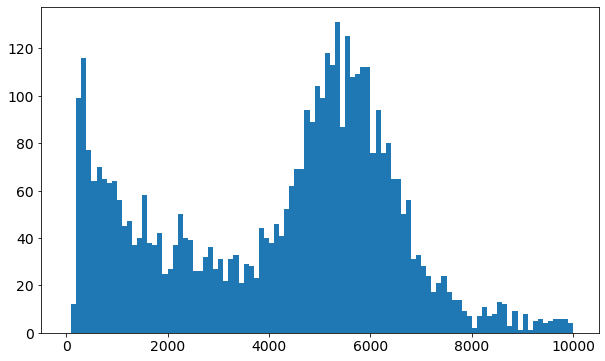

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(dfc['photons'], 100, range=(0,10000))
plt.show()